In [1]:
import pathlib
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
data_dir_train = pathlib.Path(r"C:\Users\RAJA SEKHAR\CNN_assignment (1)_unzipped_dataset\Skin cancer ISIC The International Skin Imaging Collaboration\Train")  
data_dir_test = pathlib.Path(r"C:\Users\RAJA SEKHAR\CNN_assignment (1)_unzipped_dataset\Skin cancer ISIC The International Skin Imaging Collaboration\Test") 

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Training images: {image_count_train}, Testing images: {image_count_test}")

Training images: 2239, Testing images: 118


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5239 files belonging to 10 classes.
Using 4192 files for training.
Found 5239 files belonging to 10 classes.
Using 1047 files for validation.


In [11]:
class_names = train_ds.class_names
print(f"Class Names: {class_names}")


Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'output', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [13]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

ValueError: num must be an integer with 1 <= num <= 9, not 10

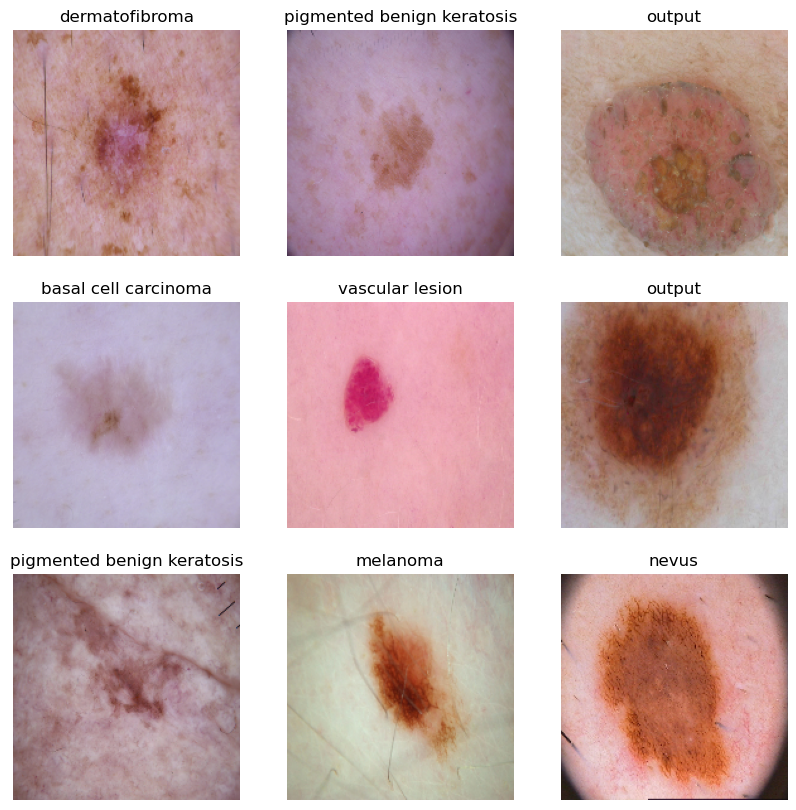

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [51]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))  # Match the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\RAJA SEKHAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,395 (25.36 MB)

 Trainable params: 6,648,395 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.4216 - loss: 33.0203 - val_accuracy: 0.5969 - val_loss: 1.8277
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.5642 - loss: 1.9286 - val_accuracy: 0.5969 - val_loss: 2.0365
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.5440 - loss: 2.3849 - val_accuracy: 0.5969 - val_loss: 1.6554
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5739 - loss: 1.6157 - val_accuracy: 0.5960 - val_loss: 1.5209
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.5755 - loss: 1.5485 - val_accuracy: 0.5969 - val_loss: 1.5183
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.5733 - loss: 1.5711 - val_accuracy: 0.5969 - val_loss: 1.6089
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 791ms/step - accuracy: 0.5733 - loss: 1.5549 - val_accuracy: 0.6008 - val_loss: 1.4832
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 793ms/step - accuracy: 0.5614 - loss: 1.5568 - v

Text(0.5, 1.0, 'Training and Validation Accuracy')

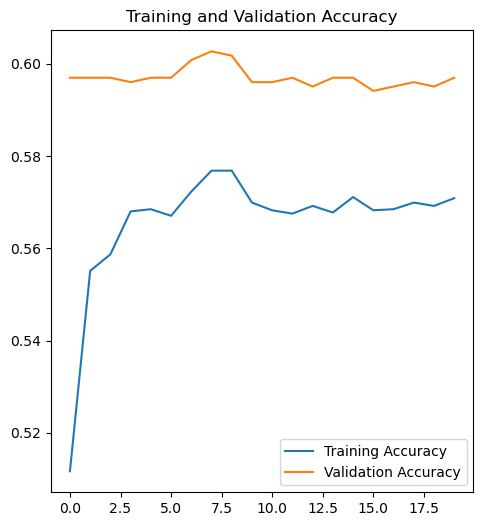

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

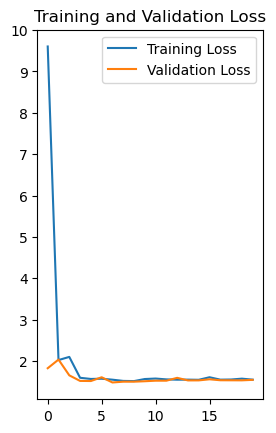

In [65]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
print("Class Distribution in Training Dataset:")
for class_name in class_names:
    class_path = list(data_dir_train.glob(f'{class_name}/*'))
    print(f"{class_name}: {len(class_path)} images")

Class Distribution in Training Dataset:
actinic keratosis: 114 images
basal cell carcinoma: 376 images
dermatofibroma: 95 images
melanoma: 438 images
nevus: 357 images
output: 9 images
pigmented benign keratosis: 462 images
seborrheic keratosis: 77 images
squamous cell carcinoma: 181 images
vascular lesion: 139 images
